# 3. 텍스트의 분포로 벡터화 하기

## Bag of Words 구현하기

### keras Tokenizer 활용

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentence) # 단어장 생성
bow = dict(tokenizer.word_counts) # 각 단어와 각 단어의 빈도를 bow에 저장

print("Bag of Words :", bow) # bow 출력
print('단어장(Vocabulary)의 크기 :', len(tokenizer.word_counts)) # 중복을 제거한 단어들의 개수

Bag of Words : {'john': 1, 'likes': 3, 'to': 2, 'watch': 2, 'movies': 2, 'mary': 2, 'too': 1, 'also': 1, 'football': 1, 'games': 1}
단어장(Vocabulary)의 크기 : 10


- 단어장의 크기는 10 , 중복을 제거한 단어들의 집합 
- Bag of words 랑은 다른 개념이다.

### scikit-learn CountVectorizer 활용

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]

vector = CountVectorizer()
bow = vector.fit_transform(sentence).toarray()

print('Bag of Words : ', bow) # 코퍼스로부터 각 단어의 빈도수를 기록한다.
print('각 단어의 인덱스 :', vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

Bag of Words :  [[1 1 1 1 3 2 2 2 1 2]]
각 단어의 인덱스 : {'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


In [3]:
print('단어장(Vocabulary)의 크기 :', len(vector.vocabulary_))

단어장(Vocabulary)의 크기 : 10


## DTM과 코사인 유사도

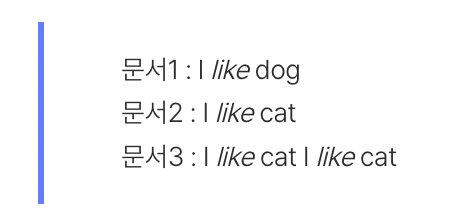

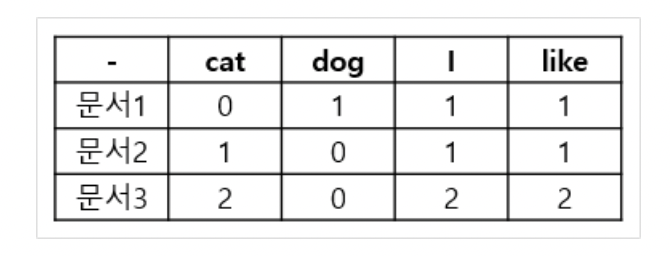

In [4]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

doc1 = np.array([0,1,1,1]) # 문서1 벡터
doc2 = np.array([1,0,1,1]) # 문서2 벡터
doc3 = np.array([2,0,2,2]) # 문서3 벡터

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

In [5]:
print('{:.2f}'.format(cos_sim(doc1, doc2))) #문서1과 문서2의 코사인 유사도
print('{:.2f}'.format(cos_sim(doc1, doc3))) #문서1과 문서3의 코사인 유사도
print('{:.2f}'.format(cos_sim(doc2, doc3))) #문서2과 문서3의 코사인 유사도

0.67
0.67
1.00


## DTM의 구현과 한계점

### scikit-learn CountVectorizer 활용
- 3개의 문서에 대해서 DTM을 만드는 과정을 보여준다.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'John likes to watch movies',
    'Mary likes movies too',
    'Mary also likes to watch football games',    
]
vector = CountVectorizer()

print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도수를 기록.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 0 0 1 1 0 1 1 0 1]
 [0 0 0 0 1 1 1 0 1 0]
 [1 1 1 0 1 1 0 1 0 1]]
{'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


## 단어 빈도를 이용한 벡터화 (6) TF-IDF 구현하기

### TF-IDF 구현하기


In [7]:
from math import log
import pandas as pd
print('=3')

=3


In [8]:
#  문서 3개의 단어들이 모두 들어간 통합 단어장 만들기
docs = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',  
]
print('=3')

=3


In [9]:
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
print('단어장의 크기 :', len(vocab))
print(vocab)

단어장의 크기 : 13
['James', 'John', 'Mary', 'TV', 'also', 'and', 'football', 'games', 'likes', 'movies', 'to', 'too', 'watch']


- 단어장 크기는 13  > 중복 제거한

In [10]:
N = len(docs) # 총 문서의 수
N

3

In [11]:
def tf(t, d):
    return d.count(t)
 
def idf(t):
    df = 0
    for doc in docs:
        df += t in doc    
    return log(N/(df + 1)) + 1
 
def tfidf(t, d):
    return tf(t,d)* idf(t)

In [12]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tf(t, d))
        
tf_ = pd.DataFrame(result, columns = vocab)
tf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0,1,1,0,0,1,0,0,2,2,2,1,1
1,1,0,0,1,0,0,0,0,1,0,1,0,1
2,0,0,1,0,1,0,1,1,1,0,1,0,1


In [13]:
# 각 단어의 IDF를 구해봅시다.

result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns=["IDF"])
idf_

,IDF
James,1.405465
John,1.405465
Mary,1.000000
TV,1.405465
also,1.405465
and,1.405465
football,1.405465
games,1.405465
likes,0.712318
movies,1.405465


- likes , to , watch 와 같이 모든 문서에 등장한 단러가 가장 낮은 값을 가진다. 
- IDF 가 낮은 값들 > 특이하지 않은 값들 

In [14]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0.000000,1.405465,1.0,0.000000,0.000000,1.405465,0.000000,0.000000,1.424636,2.81093,1.424636,1.405465,0.712318
1,1.405465,0.000000,0.0,1.405465,0.000000,0.000000,0.000000,0.000000,0.712318,0.00000,0.712318,0.000000,0.712318
2,0.000000,0.000000,1.0,0.000000,1.405465,0.000000,1.405465,1.405465,0.712318,0.00000,0.712318,0.000000,0.712318


### scikit-learn TFidVectorizer 활용
-  사이킷런에서는 TF-IDF를 자동으로 계산하여 출력하는 TfidfVectorizer를 제공합니다.
- TfidfVectorizer는 위에서 우리가 파이썬으로 구현한 식에서 더 나아가 log항의 분자에도 1을 더해주며, TF-IDF의 결과에 L2 Norm까지 추가로 수행한다는 점이 다릅니다.


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',  
]

tfidfv = TfidfVectorizer().fit(corpus)
vocab = list(tfidfv.vocabulary_.keys()) # 단어장을 리스트로 저장
vocab.sort() # 단어장을 알파벳 순으로 정렬

# TF-IDF 행렬에 단어장을 데이터프레임의 열로 지정하여 데이터프레임 생성
tfidf_ = pd.DataFrame(tfidfv.transform(corpus).toarray(), columns = vocab)
tfidf_

,also,and,football,games,james,john,likes,mary,movies,to,too,tv,watch
0,0.000000,0.321556,0.000000,0.000000,0.000000,0.321556,0.379832,0.244551,0.643111,0.189916,0.321556,0.000000,0.189916
1,0.000000,0.000000,0.000000,0.000000,0.572929,0.000000,0.338381,0.000000,0.000000,0.338381,0.000000,0.572929,0.338381
2,0.464997,0.000000,0.464997,0.464997,0.000000,0.000000,0.274634,0.353642,0.000000,0.274634,0.000000,0.000000,0.274634


## LSA와 LDA (2) LSA 실습

In [16]:
import pandas as pd
import numpy as np
import urllib.request
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [17]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /aiffel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /aiffel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 데이터 다운로드 및 확인

In [6]:
import os

csv_filename = os.getenv('HOME')+'/aiffel/topic_modelling/data/abcnews-date-text.csv'

urllib.request.urlretrieve("https://raw.githubusercontent.com/franciscadias/data/master/abcnews-date-text.csv", 
                           filename=csv_filename)

('/aiffel/aiffel/topic_modelling/data/abcnews-date-text.csv',
 <http.client.HTTPMessage at 0x7f4f587285e0>)

In [19]:
data = pd.read_csv(csv_filename, on_bad_lines='skip')
data.shape

(1082168, 2)

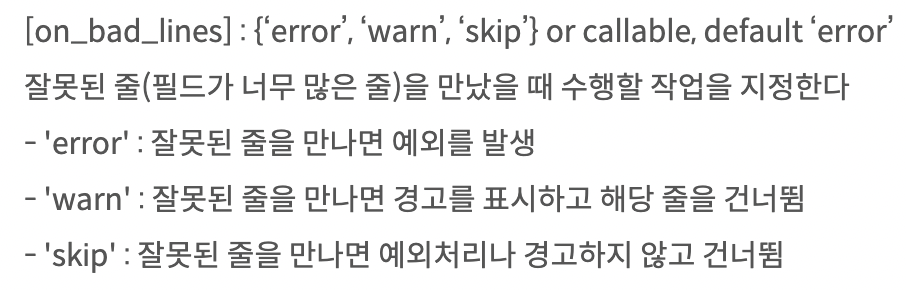

https://atotw.tistory.com/485

In [20]:
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


- publish_date는 이번 실습에 불필요하므로 headline_text만 별도로 저장

In [21]:
text = data[['headline_text']].copy()
text.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [22]:
text.nunique() # 중복을 제외하고 유일한 시퀀스를 가지는 샘플의 개수를 출력

headline_text    1054983
dtype: int64

- unique()는 데이터에 고유값들의 수를 출력해주는 함수이다. 
- 데이터의 고유값의 총 수를 알고 싶을때 유용한 함수 
- 108만개에서 중복을 제외하면 105만개의 샘플 존재 > 중복 데이터 약 3만개 

In [23]:
text.drop_duplicates(inplace=True) # 중복 샘플 제거
text.reset_index(drop=True, inplace=True)
text.shape

(1054983, 1)

- drop_duplicates > 중복 요소를 삭제해주는 함수 
- reset_index > 인덱스를 리셋 시키는데 사용 
- 여기서는 중복 데이터를 삭제하면 중복된 데이터가 빠진 자리에 빈 공간이 생기니까 그 자리를 메꾸기 위해 인덱스를 0부터 순서대로 재정비(?) 시켜주는 건가?

https://kongdols-room.tistory.com/123

### 데이터 정제 및 정규화
- NLTK의 토크나이저를 이용해 전체 텍스트 데이터에 대해서 단어 토큰화를 수행하고, NLTK가 제공하는 불용어 리스트를 사용하여 불용어를 제거한다.
- 불용어 > 자주 등장하지만 분석을 하는 것에 있어서 큰 도움이 되지 않는 단어들 

In [24]:
# NLTK 토크나이저를 이용해서 토큰화
text['headline_text'] = text.apply(lambda row: nltk.word_tokenize(row['headline_text']), axis=1)

# 불용어 제거
stop_words = stopwords.words('english')
text['headline_text'] = text['headline_text'].apply(lambda x: [word for word in x if word not in (stop_words)])

text.head()

,headline_text
0,"[aba, decides, community, broadcasting, licence]"
1,"[act, fire, witnesses, must, aware, defamation]"
2,"[g, calls, infrastructure, protection, summit]"
3,"[air, nz, staff, aust, strike, pay, rise]"
4,"[air, nz, strike, affect, australian, travellers]"


- stopwords.words("english")는 NLTK가 정의한 영어 불용어 리스트를 리턴합니다.
https://wikidocs.net/22530
- 정제되지 않은 데이터랑 비교해봤을때 불용어가 삭제된걸 확인할 수 있다. 

##### 동일한 단어지만 다른 표현을 가지는 단어들을 하나의 단어로 통합하는 단어 정규화 과정, 길이가 1~2인 단어를 제거하는 전처리 진행 

In [25]:
# 단어 정규화. 3인칭 단수 표현 -> 1인칭 변환, 과거형 동사 -> 현재형 동사 등을 수행한다.
text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

# 길이가 1 ~ 2인 단어는 제거.
text = text['headline_text'].apply(lambda x: [word for word in x if len(word) > 2])
print(text[:5])

0     [aba, decide, community, broadcast, licence]
1    [act, fire, witness, must, aware, defamation]
2       [call, infrastructure, protection, summit]
3            [air, staff, aust, strike, pay, rise]
4    [air, strike, affect, australian, travellers]
Name: headline_text, dtype: object


- 표제어 추출( Lemmatization) ) > 단어들로부터 표제어를 찾아가는 과정 
- 표제어는 한글로는 '표제어' 또는 '기본 사전형 단어'의 의미를 갖는다.
- NLTK에서는 표제어 추출을 위한 도구인 WordNetLemmatizer를 지원

### 역토큰화 및 DTM 생성
- 토큰화 과정을 역으로 되돌리는 역토큰화 수행

In [26]:
# 역토큰화 (토큰화 작업을 역으로 수행)
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(text[i])
    detokenized_doc.append(t)

train_data = detokenized_doc
print('=3')

=3


- append() > 괄호() 안에 값을 입력하면 새로운 요소를 array 맨 끝에 객체로 추가한다.
https://ooyoung.tistory.com/117

In [27]:
train_data[:5]

['aba decide community broadcast licence',
 'act fire witness must aware defamation',
 'call infrastructure protection summit',
 'air staff aust strike pay rise',
 'air strike affect australian travellers']

- CountVectorizer를 사용하여 DTM을 생성해봅시다. 단어의 수는 5,000개로 제한

In [28]:
# 상위 5000개의 단어만 사용
c_vectorizer = CountVectorizer(stop_words='english', max_features = 5000)
document_term_matrix = c_vectorizer.fit_transform(train_data)
print('=3')

=3


In [29]:
print('행렬의 크기 :',document_term_matrix.shape)

행렬의 크기 : (1054983, 5000)


- DTM의 크기는(shape)는 (문서의 수 * 단어 집합의 크기) 이다 

### scikit-learn TruncatedSVD 활용

In [30]:
from sklearn.decomposition import TruncatedSVD

n_topics = 10
lsa_model = TruncatedSVD(n_components = n_topics)
lsa_model.fit_transform(document_term_matrix)

array([[ 1.20433505e-02, -3.68556836e-03,  1.82481435e-02, ...,
         3.66193275e-03, -3.96782938e-03,  1.05761484e-02],
       [ 2.90493119e-02, -1.08834517e-02,  1.82312080e-02, ...,
        -3.28994723e-04,  4.28324822e-03, -3.33226115e-03],
       [ 5.03442356e-03, -2.01943244e-03,  9.73433847e-03, ...,
        -2.48080540e-03, -2.86721234e-03,  4.89705948e-04],
       ...,
       [ 2.97024017e-02,  4.21467079e-03,  2.48572246e-02, ...,
         3.50185398e-02, -1.52397881e-02,  1.37960914e-02],
       [ 6.14796029e-02, -4.62312086e-03,  1.37086145e-01, ...,
         9.36711151e-01, -7.41947747e-01, -4.37512752e-01],
       [ 7.13835821e-02,  2.90352361e-02,  1.00148735e-03, ...,
         1.62467733e-02,  8.73872651e-03,  2.18501664e-02]])

In [31]:
print(lsa_model.components_.shape)

(10, 5000)


- 각 행을 전체 코퍼스의 kk개의 주제(topic)로 판단하고 각 주제에서 n개씩 단어를 출력해 봅시다.

In [32]:
terms = c_vectorizer.get_feature_names_out() # 단어 집합. 5,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lsa_model.components_, terms)

Topic 1: [('police', 0.74634), ('man', 0.4535), ('charge', 0.21093), ('new', 0.14089), ('court', 0.11161)]
Topic 2: [('man', 0.69412), ('charge', 0.30048), ('court', 0.16824), ('face', 0.11347), ('murder', 0.10684)]
Topic 3: [('new', 0.83661), ('plan', 0.23677), ('say', 0.18284), ('govt', 0.11113), ('council', 0.10921)]
Topic 4: [('say', 0.73941), ('plan', 0.35581), ('govt', 0.1674), ('council', 0.13226), ('fund', 0.07484)]
Topic 5: [('plan', 0.73187), ('council', 0.18178), ('govt', 0.14577), ('urge', 0.07772), ('water', 0.06872)]
Topic 6: [('govt', 0.53527), ('court', 0.25406), ('urge', 0.24803), ('fund', 0.20443), ('face', 0.17804)]
Topic 7: [('charge', 0.51875), ('court', 0.46039), ('face', 0.34769), ('plan', 0.12383), ('murder', 0.11542)]
Topic 8: [('win', 0.6422), ('court', 0.33338), ('kill', 0.1565), ('crash', 0.13666), ('australia', 0.09414)]
Topic 9: [('court', 0.54431), ('face', 0.14599), ('accuse', 0.12232), ('govt', 0.11912), ('jail', 0.07138)]
Topic 10: [('council', 0.63924

## LSA와 LDA (4) LDA 실습

### TF-IDF 행렬 생성

In [33]:
# 상위 5,000개의 단어만 사용
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tf_idf_matrix = tfidf_vectorizer.fit_transform(train_data)

# TF-IDF 행렬의 크기를 확인해봅시다.
print('행렬의 크기 :', tf_idf_matrix.shape)

행렬의 크기 : (1054983, 5000)


### scikit-learn LDA Model 활용

In [34]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=777, max_iter=1)
lda_model.fit_transform(tf_idf_matrix)

array([[0.0335099 , 0.0335099 , 0.0335099 , ..., 0.17024867, 0.0335099 ,
        0.0335099 ],
       [0.03365631, 0.03365631, 0.03365631, ..., 0.03365631, 0.03365631,
        0.03365631],
       [0.25184095, 0.0366096 , 0.0366096 , ..., 0.0366096 , 0.0366096 ,
        0.0366096 ],
       ...,
       [0.26687206, 0.02914502, 0.02914502, ..., 0.13007484, 0.02916018,
        0.28739608],
       [0.10378115, 0.02637829, 0.12325014, ..., 0.02637829, 0.02637829,
        0.02637829],
       [0.03376055, 0.03376055, 0.2255442 , ..., 0.03376055, 0.03376055,
        0.03376055]])

In [35]:
# 행렬의 크기 확인 
print(lda_model.components_.shape)

(10, 5000)


In [36]:
terms = tfidf_vectorizer.get_feature_names_out()

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda_model.components_, terms)

Topic 1: [('australia', 9359.06334), ('sydney', 5854.97288), ('attack', 4784.76322), ('change', 4193.63035), ('year', 3924.88997)]
Topic 2: [('government', 6344.07413), ('charge', 5947.12292), ('man', 4519.7974), ('state', 3658.16422), ('live', 3625.10473)]
Topic 3: [('australian', 7666.65651), ('say', 7561.01807), ('police', 5513.22932), ('home', 4048.38409), ('report', 3796.04446)]
Topic 4: [('melbourne', 5298.35047), ('south', 4844.59835), ('death', 4281.78433), ('china', 3214.44581), ('women', 3029.28443)]
Topic 5: [('win', 5704.0914), ('canberra', 4322.0963), ('die', 4025.63057), ('open', 3771.65243), ('warn', 3577.47151)]
Topic 6: [('court', 5246.3124), ('world', 4536.86331), ('country', 4166.34794), ('woman', 3983.97748), ('crash', 3793.50267)]
Topic 7: [('election', 5418.5038), ('adelaide', 4864.95604), ('house', 4478.6135), ('school', 3966.82676), ('2016', 3955.11155)]
Topic 8: [('trump', 8189.58575), ('new', 6625.2724), ('north', 3705.40987), ('rural', 3521.42659), ('donald',

## 텍스트 분포를 이용한 비지도 학습 토크나이저 (1) 형태소 분석기와 단어 미등록 문제


### 형태소 분석기의 필요성
- 한국어는 교착어다 
- 하나의 낱말 하나의 어근과 각각 단일한 기능을 가지는 하나 이상의 접사의 결합으로 이루어져 있는 언어를 말한다. 
- 한국어는 영어와 달리 조사나 접삭 존재하며, 영어처럼 띄어쓰기 단위 토큰화가 제대로 동작하지 않는다. 

In [37]:
en_text = "The dog ran back to the corner near the spare bedrooms"
print(en_text.split())

['The', 'dog', 'ran', 'back', 'to', 'the', 'corner', 'near', 'the', 'spare', 'bedrooms']


In [2]:
kor_text = "나는 당신을 사랑하고 당신의 행복을 사랑합니다. 나는 온 세상 사람이 당신을 사랑하고 당신의 행복을 사랑하기를 바랍니다."
print(kor_text.split())

['나는', '당신을', '사랑하고', '당신의', '행복을', '사랑합니다.', '나는', '온', '세상', '사람이', '당신을', '사랑하고', '당신의', '행복을', '사랑하기를', '바랍니다.']


- 당신을 , 당신의 를 각각 다른 단어로 인식한다. > 을 , 의가 붙어있어서 

In [3]:
from konlpy.tag import Okt

tokenizer = Okt()
print(tokenizer.morphs(kor_text))

['나', '는', '당신', '을', '사랑', '하고', '당신', '의', '행복', '을', '사랑', '합니다', '.', '나', '는', '온', '세상', '사람', '이', '당신', '을', '사랑', '하고', '당신', '의', '행복', '을', '사랑', '하기를', '바랍니다', '.']


### 단어 미등록 문제
- 기존의 형태소 분석기는 등록된 단어를 기준으로 형태소를 분류해 내어 새롭게 만들어진 단어를 인식하기 어렵다는 단점이 있다. 

In [4]:
print(tokenizer.morphs('모두의연구소에서 자연어 처리를 공부하는 건 정말 즐거워'))

['모두', '의', '연구소', '에서', '자연어', '처리', '를', '공부', '하는', '건', '정말', '즐거워']


### soynlp 실습

In [7]:
import urllib.request

txt_filename = os.getenv('HOME')+'/aiffel/topic_modelling/data/2016-10-20.txt'

urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt",\
                            filename=txt_filename)

('/aiffel/aiffel/topic_modelling/data/2016-10-20.txt',
 <http.client.HTTPMessage at 0x7f4f3004c580>)

In [8]:
from soynlp import DoublespaceLineCorpus

# 말뭉치에 대해서 다수의 문서로 분리
corpus = DoublespaceLineCorpus(txt_filename)
len(corpus)

30091

In [9]:
i = 0
for document in corpus:
  if len(document) > 0:
    print(document)
    i = i+1
  if i == 3:
    break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

- 비지도 학습 형태소 분석기이므로 기존의 형태소 분석기와는 달리 학습 과정을 거쳐야 한다. 
- WordExtractor.extract()를 통해서 전체 코퍼스에 대해 단어 점수표를 계산할 수 있습니다.

In [10]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 1.180 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


### soynlp의 응집 확률(cohesion probability)
- 내부 문자열이 얼마나 응집하여 자주 등장하는지를 판단하는 척도 
- 문자열을 문자 단위로 분리하여 내부 문자열을 만드는 과정에서, 왼쪽부터 순서대로 문자를 추가하면서 각 문자열이 주어졌을 때 그 다음 문자가 나올 확률을 계산하여 누적 곱을 한 값
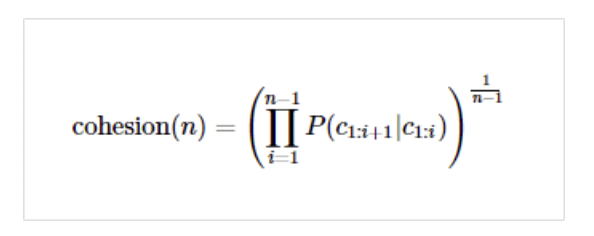


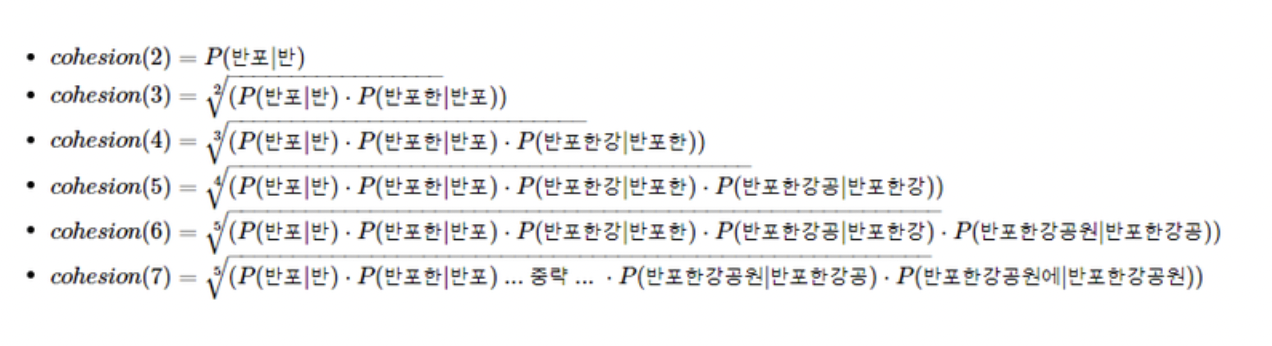

In [11]:
word_score_table["반포한"].cohesion_forward

0.08838002913645132

In [12]:
word_score_table["반포한강"].cohesion_forward

0.19841268168224552

In [13]:
word_score_table["반포한강공"].cohesion_forward

0.2972877884078849

In [14]:
word_score_table["반포한강공원"].cohesion_forward

0.37891487632839754

In [15]:
word_score_table["반포한강공원에"].cohesion_forward

0.33492963377557666

- 응집 확률이 높아지는 부분은 "반포한강공원" 이다 

### soynlp의 브랜칭 엔트로피(branching entropy)
- 주어진 문자열에서 다음 문자가 등장할 수 있는 가능성을 판단하는 척도 
- 주어진 문자 시퀀스에서 다음 문자 예측을 위해 헷갈리는 정도
- 브랜칭 엔트로피의 값은 하나의 완성된 단어에 가까워질수록 문맥으로 인해 정확히 예측할 수 잇게 되므로 점차 줄어든다.

In [16]:
word_score_table["디스"].right_branching_entropy

1.6371694761537934

In [17]:
word_score_table["디스플"].right_branching_entropy

-0.0

In [18]:
word_score_table["디스플레"].right_branching_entropy

-0.0

In [19]:
word_score_table["디스플레이"].right_branching_entropy

3.1400392861792916

- 값이 급증하는 이유 > 완성된 문자 시퀀스 다음에는 조사나 다른 언어가 나올 수 있는 다양한 경우가 있을 수 있기 때문 
- 하나의 단어가 끝나면 그 경계 부분부터 다시 브랜칭 엔트로피값이 증가한다. 

### soynlp의 LTokenizer
- 띄어쓰기 단위로 잘 나뉜 문장으 L 토크나이저를 사용하면 좋다. 
- 한국어는 띄어쓰기 단위로 나눈 어절 토큰이 주로 L토큰 + R 토큰의 형식을 가질때가 많다. 
- L토크나이저는 L토큰 + R토큰으로 나누되, 점수가 가장 높은 L토큰을 찾아내는 분리 기준을 가지고 있다. 

In [20]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
l_tokenizer = LTokenizer(scores=scores)
l_tokenizer.tokenize("국제사회와 우리의 노력들로 범죄를 척결하자", flatten=False)

[('국제사회', '와'), ('우리', '의'), ('노력', '들로'), ('범죄', '를'), ('척결', '하자')]

### 최대 점수 토크나이저
- 띄어쓰기가 되어 있지 않은 문장에서 점수가 높은 글자 시퀀스를 순차적으로 찾아내는 토크나이저

In [21]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("국제사회와우리의노력들로범죄를척결하자")

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']